<a href="https://colab.research.google.com/github/Benza1611/DWDM21/blob/main/Project_%E0%B8%A5%E0%B9%88%E0%B8%B2%E0%B8%AA%E0%B8%B8%E0%B8%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd #ส่วนของการ Import
import os

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/My Drive/DWDM2021_Project' #กำหนด path ของโฟลเดอร์ที่ Data อยู่

##ที่มาของข้อมูลสถานีรับส่งผู้โดยสารการรถไฟเเห่งประเทศไทย

https://data.go.th/dataset/station

In [4]:
data_st = pd.read_csv(os.path.join(path,'data_station.csv')) #กำหนดตัวแปร data_st เป็นข้อมูลของสถานีรถไฟแต่ละสถานี
data_st #เรียกดูตารางของสถานีรถไฟแต่ละสถานี

,id,station_code,name,en_name,th_short,en_short,chname,controldivision,exact_km,exact_distance,km,class,lat,long,active,giveway,dual_track
0,1,1001,กรุงเทพ,Bangkok,กท.,BKK,曼谷,14,0,0,0,11,13.739277,100.517391,1,1,1
1,2,1002,ยมราช,Yommaraj,ยช.,YMR,勇马拉,14,2,2,2,99,0,0,1,1,1
2,3,1004,สามเสน,Sam Sen,สส.,SAM,三森,14,5,4,4,1,13.779293,100.529235,1,1,1
3,4,1006,ประดิพัทธ์,Pra Dipat,ปอิ.,PDP,帕涤潘,14,6,6,6,99,0,0,1,1,1
4,5,1007,ชุมทางบางซื่อ,Bang Sue Junction,บซ.,BSJ,邦苏总站,14,7,7,7,1,13.8043,100.54005,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,678,5025,บางโทรัด,Bang Thorat,งโ.,BTR,邦托拉,0,14,-13,13,98,0,0,1,0,0
678,679,5026,บ้านกาหลง,Ban Ka Long,กห.,BLG,班卡龙,0,16,-15,15,98,0,0,1,0,0
679,680,5027,บ้านนาขวาง,Ban Na Khwang,อ้บ.,BNW,班那煌,0,18,-17,17,98,0,0,1,0,0
680,681,5028,บ้านนาโคก,Ban Na Khok,าโ.,BNH,班那柯,0,20,-19,19,98,0,0,1,0,0


##ที่มาของข้อมูลขบวนรถไฟสำหรับรับ-ส่งผู้โดยสาร

https://data.go.th/dataset/train

In [5]:
data_t = pd.read_csv(os.path.join(path,'data_train.csv')) #กำหนดตัวแปร data_t เป็นข้อมูลของรถไฟ
data_t #เรียกดูตารางข้อมูลรถไฟ

,Zone,goback,Num,IdTrain,NameFee,StStart,NameSt,StFinal,NameSt_L,NameStEng,NameStEng_L,Service
0,1,1,0.0,997,เร็ว,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,Bangkok,Ban Plu Ta Luang,False
1,1,1,1.0,1049,ธรรมดา,1001,กรุงเทพ,1007,ชุมทางบางซื่อ,Bangkok,Bang Sue Junction,True
2,1,1,1.0,379,ธรรมดา,3001,มักกะสัน,3015,หัวตะเข้,Makkasan,Hua Takhe,False
3,1,1,2.0,1053,ธรรมดา,1001,กรุงเทพ,1007,ชุมทางบางซื่อ,Bangkok,Bang Sue Junction,True
4,1,1,4.0,283,ธรรมดา,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,Bangkok,Ban Plu Ta Luang,False
...,...,...,...,...,...,...,...,...,...,...,...,...
229,5,2,26.0,260,ธรรมดา,4077,น้ำตก,4002,ธนบุรี,Nam Tok,Thon Buri,False
230,5,2,27.0,252,ธรรมดา,4142,ประจวบคีรีขันธ์,4002,ธนบุรี,Prachuap Khiri Khan,Thon Buri,False
231,5,2,28.0,254,ธรรมดา,4203,หลังสวน,4002,ธนบุรี,Lang Suan,Thon Buri,False
232,5,2,29.0,258,ธรรมดา,4077,น้ำตก,4002,ธนบุรี,Nam Tok,Thon Buri,False


##ที่มาของข้อมูล railstation

https://datagov.mot.go.th/dataset/train-station

In [6]:
data_rst = pd.read_csv(os.path.join(path,'railstation_new.csv')) #กำหนดตัวแปร data_rst ให้เป็นรางรถไฟ
data_rst #เรียกดูตารางของรางรถไฟ

,OBJECTID,NAMET,NAMEE,ProvName,AmpName,TamName,X,Y
0,1,บ้านเกาะปริง,BAN KO PRING UNMANNED STATION,,ทุ่งสง,NaN,99.644994,8.213274
1,2,ห้วยยอด,HUAI YOT RAILWAY STATION,,ห้วยยอด,,99.637987,7.785456
2,3,โรงเรียนการบิน,FLYING TRAINING SCHOOL UNMANNED STATION,,กำแพงแสน,,99.956660,14.088246
3,4,บ้านปลักแรด,BAN PLUK RAET UNMANNED STATION,,ท่าเรือ,,100.725785,14.530267
4,5,เด่นชัย,DEN CHAI RAILWAY STATION,PHRAE,เด่นชัย,DEN CHAI,100.046225,17.980781
...,...,...,...,...,...,...,...,...
677,678,ศูนย์ราชการจังหวัดสระแก้ว,THE GOVERNMENT COMPLEX SA KAEO UNMANNED STATION,,เมืองสระแก้ว,,102.138802,13.799641
678,679,ทุ่งทอง,THUNG THONG UNMANNED STATION,,ท่าม่วง,,99.638000,13.980168
679,680,ตลาดหนองคาย,Talat Nong Khai,,เมืองหนองคาย,,102.725416,17.878784
680,681,แกรนด์ คาแนล,GRAND CANEL UNMANNED STATION,,ดอนเมือง,,100.608267,13.941516


##ที่มาของข้อมูลชื่อตำบล อำเภอ และจังหวัด

https://www.bot.or.th/Thai/Statistics/DataManagementSystem/TempClose/FI_FM1/Code/DocLib_StandardCodeMapping/Location_Postal%20Code.xls

In [7]:
data_location = pd.read_csv(os.path.join(path,'Location_Postal_Code.csv')) ## นำเข้าข้อมูลชื่อตำบล อำเภอ และจังหวัด
data_location ##เรียกดูข้อมูลชื่อตำบล อำเภอ และจังหวัด

,Location Code,จังหวัด,เขต/อำเภอ,แขวง/ตำบล,รหัสไปรษณีย์
0,100101,กรุงเทพ,พระนคร,พระบรมมหาราชวัง,10200
1,100102,กรุงเทพ,พระนคร,วังบูรพาภิรมย์,10200
2,100103,กรุงเทพ,พระนคร,วัดราชบพิธ,10200
3,100104,กรุงเทพ,พระนคร,สำราญราษฎร์,10200
4,100105,กรุงเทพ,พระนคร,ศาลเจ้าพ่อเสือ,10200
...,...,...,...,...,...
7421,961203,นราธิวาส,จะแนะ,ผดุงมาตร,96220
7422,961204,นราธิวาส,จะแนะ,ช้างเผือก,96220
7423,961301,นราธิวาส,เจาะไอร้อง,จวบ,96130
7424,961302,นราธิวาส,เจาะไอร้อง,บูกิต,96130


##ที่มาของข้อมูลสถานการณ์การท่องเที่ยวในประเทศ รายจังหวัด ปี 2563

https://mots.go.th/more_news_new.php?cid=594

In [8]:
data_tourist = pd.read_csv(os.path.join(path,'สถานการณ์การท่องเที่ยวในประเทศ-รายจังหวัด-ปี-2563.csv')) ## นำเข้าข้อมูลสถานการณ์การท่องเที่ยวในประเทศ รายจังหวัด ปี 2563
data_tourist ##เรียกดูข้อมูล

,ภาค,จังหวัด,จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)
0,ภาคกลาง,กรุงเทพ,23617914.0
1,ภาคกลาง,ลพบุรี,1659868.0
2,ภาคกลาง,พระนครศรีอยุธยา,3560866.0
3,ภาคกลาง,สระบุรี,1673819.0
4,ภาคกลาง,ชัยนาท,394900.0
...,...,...,...
72,ภาคตะวันออกเฉียงเหนือ,อุบลราชธานี,1537178.0
73,ภาคตะวันออกเฉียงเหนือ,สกลนคร,856974.0
74,ภาคตะวันออกเฉียงเหนือ,ยโสธร,303461.0
75,ภาคตะวันออกเฉียงเหนือ,อำนาจเจริญ,153692.0


#ดูว่าข้อมูลมี data missing

In [9]:
data_st.isnull() ##ดูค่า Missing ในตาราง data_st

,id,station_code,name,en_name,th_short,en_short,chname,controldivision,exact_km,exact_distance,km,class,lat,long,active,giveway,dual_track
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
678,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
679,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
680,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
data_t.isnull() ##ดูค่า Missing ในตาราง data_t

,Zone,goback,Num,IdTrain,NameFee,StStart,NameSt,StFinal,NameSt_L,NameStEng,NameStEng_L,Service
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
229,False,False,False,False,False,False,False,False,False,False,False,False
230,False,False,False,False,False,False,False,False,False,False,False,False
231,False,False,False,False,False,False,False,False,False,False,False,False
232,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
data_rst.isnull() ##ดูค่า Missing ในตาราง data_rst

,OBJECTID,NAMET,NAMEE,ProvName,AmpName,TamName,X,Y
0,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
677,False,False,False,False,False,False,False,False
678,False,False,False,False,False,False,False,False
679,False,False,False,False,False,False,False,False
680,False,False,False,False,False,False,False,False


In [12]:
data_location.isnull() ##ดูค่า Missing ในตาราง data_location

,Location Code,จังหวัด,เขต/อำเภอ,แขวง/ตำบล,รหัสไปรษณีย์
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
7421,False,False,False,False,False
7422,False,False,False,False,False
7423,False,False,False,False,False
7424,False,False,False,False,False


In [13]:
data_tourist.isnull() ##ดูค่า Missing ในตาราง data_prov

,ภาค,จังหวัด,จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
72,False,False,False
73,False,False,False
74,False,False,False
75,False,False,False


#สรุปข้อมูลเป็นรายคอลลัมม์ว่ามี missing

In [14]:
data_st.isnull().any()  ##ดูค่า Missing รายคอลัมน์ของตาราง data_st

id                 False
station_code       False
name               False
en_name            False
th_short           False
en_short            True
chname              True
controldivision    False
exact_km           False
exact_distance     False
km                 False
class              False
lat                False
long               False
active             False
giveway            False
dual_track         False
dtype: bool

In [15]:
data_t.isnull().any() ##ดูค่า Missing รายคอลัมน์ของตาราง data_t

Zone           False
goback         False
Num            False
IdTrain        False
NameFee        False
StStart        False
NameSt         False
StFinal        False
NameSt_L       False
NameStEng      False
NameStEng_L    False
Service        False
dtype: bool

In [16]:
data_rst.isnull().any() ##ดูค่า Missing รายคอลัมน์ของตาราง data_rst

OBJECTID    False
NAMET       False
NAMEE       False
ProvName    False
AmpName     False
TamName      True
X           False
Y           False
dtype: bool

In [17]:
data_location.isnull().any()  ##ดูค่า Missing รายคอลัมน์ของตาราง data_location

Location Code    False
จังหวัด          False
เขต/อำเภอ         True
แขวง/ตำบล        False
รหัสไปรษณีย์     False
dtype: bool

In [18]:
data_tourist.isnull().any()  ##ดูค่า Missing รายคอลัมน์ของตาราง data_prov

ภาค                                False
จังหวัด                            False
จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)    False
dtype: bool

#Drop missing value

ลบค่าที่เป็น Missing

In [19]:
data_st = data_st.dropna() ##ลบค่า Missing ในตาราง data_st
data_st ##เรียกดูตาราง data_st

,id,station_code,name,en_name,th_short,en_short,chname,controldivision,exact_km,exact_distance,km,class,lat,long,active,giveway,dual_track
0,1,1001,กรุงเทพ,Bangkok,กท.,BKK,曼谷,14,0,0,0,11,13.739277,100.517391,1,1,1
1,2,1002,ยมราช,Yommaraj,ยช.,YMR,勇马拉,14,2,2,2,99,0,0,1,1,1
2,3,1004,สามเสน,Sam Sen,สส.,SAM,三森,14,5,4,4,1,13.779293,100.529235,1,1,1
3,4,1006,ประดิพัทธ์,Pra Dipat,ปอิ.,PDP,帕涤潘,14,6,6,6,99,0,0,1,1,1
4,5,1007,ชุมทางบางซื่อ,Bang Sue Junction,บซ.,BSJ,邦苏总站,14,7,7,7,1,13.8043,100.54005,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,678,5025,บางโทรัด,Bang Thorat,งโ.,BTR,邦托拉,0,14,-13,13,98,0,0,1,0,0
678,679,5026,บ้านกาหลง,Ban Ka Long,กห.,BLG,班卡龙,0,16,-15,15,98,0,0,1,0,0
679,680,5027,บ้านนาขวาง,Ban Na Khwang,อ้บ.,BNW,班那煌,0,18,-17,17,98,0,0,1,0,0
680,681,5028,บ้านนาโคก,Ban Na Khok,าโ.,BNH,班那柯,0,20,-19,19,98,0,0,1,0,0


In [20]:
data_rst = data_rst.dropna() ##ลบค่า Missing ในตาราง data_rst
data_rst ##เรียกดูตาราง data_rst

,OBJECTID,NAMET,NAMEE,ProvName,AmpName,TamName,X,Y
1,2,ห้วยยอด,HUAI YOT RAILWAY STATION,,ห้วยยอด,,99.637987,7.785456
2,3,โรงเรียนการบิน,FLYING TRAINING SCHOOL UNMANNED STATION,,กำแพงแสน,,99.956660,14.088246
3,4,บ้านปลักแรด,BAN PLUK RAET UNMANNED STATION,,ท่าเรือ,,100.725785,14.530267
4,5,เด่นชัย,DEN CHAI RAILWAY STATION,PHRAE,เด่นชัย,DEN CHAI,100.046225,17.980781
5,6,บ้านกกกว้าว,BAN KOK KWAO HALT,,ตาคลี,,100.442303,15.141322
...,...,...,...,...,...,...,...,...
677,678,ศูนย์ราชการจังหวัดสระแก้ว,THE GOVERNMENT COMPLEX SA KAEO UNMANNED STATION,,เมืองสระแก้ว,,102.138802,13.799641
678,679,ทุ่งทอง,THUNG THONG UNMANNED STATION,,ท่าม่วง,,99.638000,13.980168
679,680,ตลาดหนองคาย,Talat Nong Khai,,เมืองหนองคาย,,102.725416,17.878784
680,681,แกรนด์ คาแนล,GRAND CANEL UNMANNED STATION,,ดอนเมือง,,100.608267,13.941516


In [21]:
data_location = data_location.dropna() ##ลบค่า Missing ในตาราง data_location
data_location ##เรียกดูตาราง data_location

,Location Code,จังหวัด,เขต/อำเภอ,แขวง/ตำบล,รหัสไปรษณีย์
0,100101,กรุงเทพ,พระนคร,พระบรมมหาราชวัง,10200
1,100102,กรุงเทพ,พระนคร,วังบูรพาภิรมย์,10200
2,100103,กรุงเทพ,พระนคร,วัดราชบพิธ,10200
3,100104,กรุงเทพ,พระนคร,สำราญราษฎร์,10200
4,100105,กรุงเทพ,พระนคร,ศาลเจ้าพ่อเสือ,10200
...,...,...,...,...,...
7421,961203,นราธิวาส,จะแนะ,ผดุงมาตร,96220
7422,961204,นราธิวาส,จะแนะ,ช้างเผือก,96220
7423,961301,นราธิวาส,เจาะไอร้อง,จวบ,96130
7424,961302,นราธิวาส,เจาะไอร้อง,บูกิต,96130


#ตรวจสอบเมื่อลบออกไปแล้วตรวจสอบว่ายังไม่ข้อมูลที่หายไปหรือไม่

In [22]:
data_st.isnull().any() ##ดูค่า Missing รายคอลัมน์ของตาราง data_st หลังการลบค่า Missing

id                 False
station_code       False
name               False
en_name            False
th_short           False
en_short           False
chname             False
controldivision    False
exact_km           False
exact_distance     False
km                 False
class              False
lat                False
long               False
active             False
giveway            False
dual_track         False
dtype: bool

In [23]:
data_rst.isnull().any() ##ดูค่า Missing รายคอลัมน์ของตาราง data_rst หลังการลบค่า Missing

OBJECTID    False
NAMET       False
NAMEE       False
ProvName    False
AmpName     False
TamName     False
X           False
Y           False
dtype: bool

In [24]:
data_location.isnull().any() ##ดูค่า Missing รายคอลัมน์ของตาราง data_location หลังการลบค่า Missing

Location Code    False
จังหวัด          False
เขต/อำเภอ        False
แขวง/ตำบล        False
รหัสไปรษณีย์     False
dtype: bool

#Percent of missing data from dropna

เปอร์เซ็นต์ข้อมูลที่สูญเสีย

In [25]:
##ตาราง data_st
st_b = 682
st_a = 679
print(f'before = {st_b} \nafter = {st_a}\nwhich is {100*((st_b-st_a)/st_b)}')

before = 682 
after = 679
which is 0.43988269794721413



จากการคำนวณจะเห็นได้ว่าตาราง data_st มีข้อมูลที่สูญเสีย 0.43 %

In [26]:
##ตาราง data_rst
rst_b = 682
rst_a = 681
print(f'before = {rst_b} \nafter = {rst_a}\nwhich is {100*((rst_b-rst_a)/rst_b)}')

before = 682 
after = 681
which is 0.1466275659824047



จากการคำนวณจะเห็นได้ว่าตาราง data_rst มีข้อมูลที่สูญเสีย 0.14 %

In [27]:
##ตาราง data_location
loca_b = 7426
loca_a = 7425
print(f'before = {loca_b} \nafter = {loca_a}\nwhich is {100*((loca_b-loca_a)/loca_b)}')

before = 7426 
after = 7425
which is 0.013466199838405602



จากการคำนวณจะเห็นได้ว่าตาราง data_location มีข้อมูลที่สูญเสีย 0.01 %

#รวมตารางหาจังหวัดต้นทางต้นทาง

In [28]:
table_st1 = data_t.merge(data_rst,how='left',left_on='NameSt',right_on='NAMET') #ทำการเชื่อมตาราง 2 ตาราง คือ data_t และ data_rst
table_st1 ##เรียกดูตาราง

,Zone,goback,Num,IdTrain,NameFee,StStart,NameSt,StFinal,NameSt_L,NameStEng,NameStEng_L,Service,OBJECTID,NAMET,NAMEE,ProvName,AmpName,TamName,X,Y
0,1,1,0.0,997,เร็ว,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,Bangkok,Ban Plu Ta Luang,False,682.0,กรุงเทพ,BANGKOK RAILWAY STATION,BANGKOK,ปทุมวัน,RONG MUEANG,100.516732,13.744026
1,1,1,1.0,1049,ธรรมดา,1001,กรุงเทพ,1007,ชุมทางบางซื่อ,Bangkok,Bang Sue Junction,True,682.0,กรุงเทพ,BANGKOK RAILWAY STATION,BANGKOK,ปทุมวัน,RONG MUEANG,100.516732,13.744026
2,1,1,1.0,379,ธรรมดา,3001,มักกะสัน,3015,หัวตะเข้,Makkasan,Hua Takhe,False,140.0,มักกะสัน,MAKKASAN RAILWAY STATION,BANGKOK,ราชเทวี,MAKKASAN,100.547316,13.753736
3,1,1,2.0,1053,ธรรมดา,1001,กรุงเทพ,1007,ชุมทางบางซื่อ,Bangkok,Bang Sue Junction,True,682.0,กรุงเทพ,BANGKOK RAILWAY STATION,BANGKOK,ปทุมวัน,RONG MUEANG,100.516732,13.744026
4,1,1,4.0,283,ธรรมดา,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,Bangkok,Ban Plu Ta Luang,False,682.0,กรุงเทพ,BANGKOK RAILWAY STATION,BANGKOK,ปทุมวัน,RONG MUEANG,100.516732,13.744026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,5,2,26.0,260,ธรรมดา,4077,น้ำตก,4002,ธนบุรี,Nam Tok,Thon Buri,False,610.0,น้ำตก,NAM TOK RAILWAY STATION,,ไทรโยค,,99.067848,14.232451
230,5,2,27.0,252,ธรรมดา,4142,ประจวบคีรีขันธ์,4002,ธนบุรี,Prachuap Khiri Khan,Thon Buri,False,99.0,ประจวบคีรีขันธ์,PRACHUAP KHIRI KHAN RAILWAY STATION,PRACHUAP KHIRI KHAN,เมืองประจวบคีรีขันธ์,PRACHUAP KHIRI KHAN,99.793905,11.807757
231,5,2,28.0,254,ธรรมดา,4203,หลังสวน,4002,ธนบุรี,Lang Suan,Thon Buri,False,20.0,หลังสวน,LANG SUAN RAILWAY STATION,CHUMPHON,หลังสวน,LANG SUAN,99.076502,9.949263
232,5,2,29.0,258,ธรรมดา,4077,น้ำตก,4002,ธนบุรี,Nam Tok,Thon Buri,False,610.0,น้ำตก,NAM TOK RAILWAY STATION,,ไทรโยค,,99.067848,14.232451


In [29]:
table_st1.isnull().any() ##ดูค่า Missing ในตารางราย Column

Zone           False
goback         False
Num            False
IdTrain        False
NameFee        False
StStart        False
NameSt         False
StFinal        False
NameSt_L       False
NameStEng      False
NameStEng_L    False
Service        False
OBJECTID        True
NAMET           True
NAMEE           True
ProvName        True
AmpName         True
TamName         True
X               True
Y               True
dtype: bool

In [30]:
table_st1 = table_st1.dropna() ##ลบค่า Missing ในตาราง
table_st1 ##เรียกดูตาราง

,Zone,goback,Num,IdTrain,NameFee,StStart,NameSt,StFinal,NameSt_L,NameStEng,NameStEng_L,Service,OBJECTID,NAMET,NAMEE,ProvName,AmpName,TamName,X,Y
0,1,1,0.0,997,เร็ว,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,Bangkok,Ban Plu Ta Luang,False,682.0,กรุงเทพ,BANGKOK RAILWAY STATION,BANGKOK,ปทุมวัน,RONG MUEANG,100.516732,13.744026
1,1,1,1.0,1049,ธรรมดา,1001,กรุงเทพ,1007,ชุมทางบางซื่อ,Bangkok,Bang Sue Junction,True,682.0,กรุงเทพ,BANGKOK RAILWAY STATION,BANGKOK,ปทุมวัน,RONG MUEANG,100.516732,13.744026
2,1,1,1.0,379,ธรรมดา,3001,มักกะสัน,3015,หัวตะเข้,Makkasan,Hua Takhe,False,140.0,มักกะสัน,MAKKASAN RAILWAY STATION,BANGKOK,ราชเทวี,MAKKASAN,100.547316,13.753736
3,1,1,2.0,1053,ธรรมดา,1001,กรุงเทพ,1007,ชุมทางบางซื่อ,Bangkok,Bang Sue Junction,True,682.0,กรุงเทพ,BANGKOK RAILWAY STATION,BANGKOK,ปทุมวัน,RONG MUEANG,100.516732,13.744026
4,1,1,4.0,283,ธรรมดา,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,Bangkok,Ban Plu Ta Luang,False,682.0,กรุงเทพ,BANGKOK RAILWAY STATION,BANGKOK,ปทุมวัน,RONG MUEANG,100.516732,13.744026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,5,2,26.0,260,ธรรมดา,4077,น้ำตก,4002,ธนบุรี,Nam Tok,Thon Buri,False,610.0,น้ำตก,NAM TOK RAILWAY STATION,,ไทรโยค,,99.067848,14.232451
230,5,2,27.0,252,ธรรมดา,4142,ประจวบคีรีขันธ์,4002,ธนบุรี,Prachuap Khiri Khan,Thon Buri,False,99.0,ประจวบคีรีขันธ์,PRACHUAP KHIRI KHAN RAILWAY STATION,PRACHUAP KHIRI KHAN,เมืองประจวบคีรีขันธ์,PRACHUAP KHIRI KHAN,99.793905,11.807757
231,5,2,28.0,254,ธรรมดา,4203,หลังสวน,4002,ธนบุรี,Lang Suan,Thon Buri,False,20.0,หลังสวน,LANG SUAN RAILWAY STATION,CHUMPHON,หลังสวน,LANG SUAN,99.076502,9.949263
232,5,2,29.0,258,ธรรมดา,4077,น้ำตก,4002,ธนบุรี,Nam Tok,Thon Buri,False,610.0,น้ำตก,NAM TOK RAILWAY STATION,,ไทรโยค,,99.067848,14.232451


In [31]:
table_st1.isnull().any() ##ดูค่า Missing ในตารางราย Column หลังลบค่า Missing

Zone           False
goback         False
Num            False
IdTrain        False
NameFee        False
StStart        False
NameSt         False
StFinal        False
NameSt_L       False
NameStEng      False
NameStEng_L    False
Service        False
OBJECTID       False
NAMET          False
NAMEE          False
ProvName       False
AmpName        False
TamName        False
X              False
Y              False
dtype: bool

In [32]:
##ตาราง table_st1
table_st1_b = 234
table_st1_a = 225
print(f'before = {table_st1_b} \nafter = {table_st1_a}\nwhich is {100*((table_st1_b-table_st1_a)/table_st1_b)}')

before = 234 
after = 225
which is 3.8461538461538463



จากการคำนวณจะเห็นได้ว่าตาราง table_st1 มีข้อมูลที่สูญเสีย 3.84 %

In [33]:
table_st2 = table_st1.merge(data_location,how='left',left_on='AmpName',right_on='เขต/อำเภอ') #ทำการเชื่อมตาราง 2 ตาราง คือ table_st1 และ data_location
table_st2 ##เรียกดูตาราง

,Zone,goback,Num,IdTrain,NameFee,StStart,NameSt,StFinal,NameSt_L,NameStEng,NameStEng_L,Service,OBJECTID,NAMET,NAMEE,ProvName,AmpName,TamName,X,Y,Location Code,จังหวัด,เขต/อำเภอ,แขวง/ตำบล,รหัสไปรษณีย์
0,1,1,0.0,997,เร็ว,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,Bangkok,Ban Plu Ta Luang,False,682.0,กรุงเทพ,BANGKOK RAILWAY STATION,BANGKOK,ปทุมวัน,RONG MUEANG,100.516732,13.744026,100701.0,กรุงเทพ,ปทุมวัน,รองเมือง,10330.0
1,1,1,0.0,997,เร็ว,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,Bangkok,Ban Plu Ta Luang,False,682.0,กรุงเทพ,BANGKOK RAILWAY STATION,BANGKOK,ปทุมวัน,RONG MUEANG,100.516732,13.744026,100702.0,กรุงเทพ,ปทุมวัน,วังใหม่,10330.0
2,1,1,0.0,997,เร็ว,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,Bangkok,Ban Plu Ta Luang,False,682.0,กรุงเทพ,BANGKOK RAILWAY STATION,BANGKOK,ปทุมวัน,RONG MUEANG,100.516732,13.744026,100703.0,กรุงเทพ,ปทุมวัน,ปทุมวัน,10330.0
3,1,1,0.0,997,เร็ว,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,Bangkok,Ban Plu Ta Luang,False,682.0,กรุงเทพ,BANGKOK RAILWAY STATION,BANGKOK,ปทุมวัน,RONG MUEANG,100.516732,13.744026,100704.0,กรุงเทพ,ปทุมวัน,ลุมพินี,10330.0
4,1,1,1.0,1049,ธรรมดา,1001,กรุงเทพ,1007,ชุมทางบางซื่อ,Bangkok,Bang Sue Junction,True,682.0,กรุงเทพ,BANGKOK RAILWAY STATION,BANGKOK,ปทุมวัน,RONG MUEANG,100.516732,13.744026,100701.0,กรุงเทพ,ปทุมวัน,รองเมือง,10330.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,5,2,30.0,486,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,Nam Tok,Nong Pla Duk Junction,False,610.0,น้ำตก,NAM TOK RAILWAY STATION,,ไทรโยค,,99.067848,14.232451,710203.0,กาญจนบุรี,ไทรโยค,สิงห์,71150.0
2396,5,2,30.0,486,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,Nam Tok,Nong Pla Duk Junction,False,610.0,น้ำตก,NAM TOK RAILWAY STATION,,ไทรโยค,,99.067848,14.232451,710204.0,กาญจนบุรี,ไทรโยค,ไทรโยค,71150.0
2397,5,2,30.0,486,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,Nam Tok,Nong Pla Duk Junction,False,610.0,น้ำตก,NAM TOK RAILWAY STATION,,ไทรโยค,,99.067848,14.232451,710205.0,กาญจนบุรี,ไทรโยค,วังกระแจะ,71150.0
2398,5,2,30.0,486,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,Nam Tok,Nong Pla Duk Junction,False,610.0,น้ำตก,NAM TOK RAILWAY STATION,,ไทรโยค,,99.067848,14.232451,710206.0,กาญจนบุรี,ไทรโยค,ศรีมงคล,71150.0


In [34]:
table_st2.isnull().any() ##ดูค่า Missing ในตาราง

Zone             False
goback           False
Num              False
IdTrain          False
NameFee          False
StStart          False
NameSt           False
StFinal          False
NameSt_L         False
NameStEng        False
NameStEng_L      False
Service          False
OBJECTID         False
NAMET            False
NAMEE            False
ProvName         False
AmpName          False
TamName          False
X                False
Y                False
Location Code     True
จังหวัด           True
เขต/อำเภอ         True
แขวง/ตำบล         True
รหัสไปรษณีย์      True
dtype: bool

In [35]:
table_st2 = table_st2.dropna() #กำจัดค่า Missing
table_st2 #เรียกดูตาราง

,Zone,goback,Num,IdTrain,NameFee,StStart,NameSt,StFinal,NameSt_L,NameStEng,NameStEng_L,Service,OBJECTID,NAMET,NAMEE,ProvName,AmpName,TamName,X,Y,Location Code,จังหวัด,เขต/อำเภอ,แขวง/ตำบล,รหัสไปรษณีย์
0,1,1,0.0,997,เร็ว,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,Bangkok,Ban Plu Ta Luang,False,682.0,กรุงเทพ,BANGKOK RAILWAY STATION,BANGKOK,ปทุมวัน,RONG MUEANG,100.516732,13.744026,100701.0,กรุงเทพ,ปทุมวัน,รองเมือง,10330.0
1,1,1,0.0,997,เร็ว,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,Bangkok,Ban Plu Ta Luang,False,682.0,กรุงเทพ,BANGKOK RAILWAY STATION,BANGKOK,ปทุมวัน,RONG MUEANG,100.516732,13.744026,100702.0,กรุงเทพ,ปทุมวัน,วังใหม่,10330.0
2,1,1,0.0,997,เร็ว,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,Bangkok,Ban Plu Ta Luang,False,682.0,กรุงเทพ,BANGKOK RAILWAY STATION,BANGKOK,ปทุมวัน,RONG MUEANG,100.516732,13.744026,100703.0,กรุงเทพ,ปทุมวัน,ปทุมวัน,10330.0
3,1,1,0.0,997,เร็ว,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,Bangkok,Ban Plu Ta Luang,False,682.0,กรุงเทพ,BANGKOK RAILWAY STATION,BANGKOK,ปทุมวัน,RONG MUEANG,100.516732,13.744026,100704.0,กรุงเทพ,ปทุมวัน,ลุมพินี,10330.0
4,1,1,1.0,1049,ธรรมดา,1001,กรุงเทพ,1007,ชุมทางบางซื่อ,Bangkok,Bang Sue Junction,True,682.0,กรุงเทพ,BANGKOK RAILWAY STATION,BANGKOK,ปทุมวัน,RONG MUEANG,100.516732,13.744026,100701.0,กรุงเทพ,ปทุมวัน,รองเมือง,10330.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,5,2,30.0,486,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,Nam Tok,Nong Pla Duk Junction,False,610.0,น้ำตก,NAM TOK RAILWAY STATION,,ไทรโยค,,99.067848,14.232451,710203.0,กาญจนบุรี,ไทรโยค,สิงห์,71150.0
2396,5,2,30.0,486,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,Nam Tok,Nong Pla Duk Junction,False,610.0,น้ำตก,NAM TOK RAILWAY STATION,,ไทรโยค,,99.067848,14.232451,710204.0,กาญจนบุรี,ไทรโยค,ไทรโยค,71150.0
2397,5,2,30.0,486,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,Nam Tok,Nong Pla Duk Junction,False,610.0,น้ำตก,NAM TOK RAILWAY STATION,,ไทรโยค,,99.067848,14.232451,710205.0,กาญจนบุรี,ไทรโยค,วังกระแจะ,71150.0
2398,5,2,30.0,486,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,Nam Tok,Nong Pla Duk Junction,False,610.0,น้ำตก,NAM TOK RAILWAY STATION,,ไทรโยค,,99.067848,14.232451,710206.0,กาญจนบุรี,ไทรโยค,ศรีมงคล,71150.0


In [36]:
table_st2.isnull().any() #ดูค่า Missing ในตารางราย Column

Zone             False
goback           False
Num              False
IdTrain          False
NameFee          False
StStart          False
NameSt           False
StFinal          False
NameSt_L         False
NameStEng        False
NameStEng_L      False
Service          False
OBJECTID         False
NAMET            False
NAMEE            False
ProvName         False
AmpName          False
TamName          False
X                False
Y                False
Location Code    False
จังหวัด          False
เขต/อำเภอ        False
แขวง/ตำบล        False
รหัสไปรษณีย์     False
dtype: bool

In [37]:
##ตาราง table_st2
table_st2_b = 2400
table_st2_a = 2398
print(f'before = {table_st2_b} \nafter = {table_st2_a}\nwhich is {100*((table_st2_b-table_st2_a)/table_st2_b)}')

before = 2400 
after = 2398
which is 0.08333333333333334



จากการคำนวณจะเห็นได้ว่าตาราง table_st2 มีข้อมูลที่สูญเสีย 0.08 %

In [38]:
table_st3 = table_st2.merge(data_tourist,how='left',left_on='จังหวัด',right_on='จังหวัด') #ทำการเชื่อมตาราง 2 ตาราง คือ table_st2 และ data_tourist
table_st3 #เรียกดูตาราง

,Zone,goback,Num,IdTrain,NameFee,StStart,NameSt,StFinal,NameSt_L,NameStEng,NameStEng_L,Service,OBJECTID,NAMET,NAMEE,ProvName,AmpName,TamName,X,Y,Location Code,จังหวัด,เขต/อำเภอ,แขวง/ตำบล,รหัสไปรษณีย์,ภาค,จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)
0,1,1,0.0,997,เร็ว,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,Bangkok,Ban Plu Ta Luang,False,682.0,กรุงเทพ,BANGKOK RAILWAY STATION,BANGKOK,ปทุมวัน,RONG MUEANG,100.516732,13.744026,100701.0,กรุงเทพ,ปทุมวัน,รองเมือง,10330.0,ภาคกลาง,23617914.0
1,1,1,0.0,997,เร็ว,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,Bangkok,Ban Plu Ta Luang,False,682.0,กรุงเทพ,BANGKOK RAILWAY STATION,BANGKOK,ปทุมวัน,RONG MUEANG,100.516732,13.744026,100702.0,กรุงเทพ,ปทุมวัน,วังใหม่,10330.0,ภาคกลาง,23617914.0
2,1,1,0.0,997,เร็ว,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,Bangkok,Ban Plu Ta Luang,False,682.0,กรุงเทพ,BANGKOK RAILWAY STATION,BANGKOK,ปทุมวัน,RONG MUEANG,100.516732,13.744026,100703.0,กรุงเทพ,ปทุมวัน,ปทุมวัน,10330.0,ภาคกลาง,23617914.0
3,1,1,0.0,997,เร็ว,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,Bangkok,Ban Plu Ta Luang,False,682.0,กรุงเทพ,BANGKOK RAILWAY STATION,BANGKOK,ปทุมวัน,RONG MUEANG,100.516732,13.744026,100704.0,กรุงเทพ,ปทุมวัน,ลุมพินี,10330.0,ภาคกลาง,23617914.0
4,1,1,1.0,1049,ธรรมดา,1001,กรุงเทพ,1007,ชุมทางบางซื่อ,Bangkok,Bang Sue Junction,True,682.0,กรุงเทพ,BANGKOK RAILWAY STATION,BANGKOK,ปทุมวัน,RONG MUEANG,100.516732,13.744026,100701.0,กรุงเทพ,ปทุมวัน,รองเมือง,10330.0,ภาคกลาง,23617914.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2393,5,2,30.0,486,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,Nam Tok,Nong Pla Duk Junction,False,610.0,น้ำตก,NAM TOK RAILWAY STATION,,ไทรโยค,,99.067848,14.232451,710203.0,กาญจนบุรี,ไทรโยค,สิงห์,71150.0,ภาคตะวันตก,6068266.0
2394,5,2,30.0,486,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,Nam Tok,Nong Pla Duk Junction,False,610.0,น้ำตก,NAM TOK RAILWAY STATION,,ไทรโยค,,99.067848,14.232451,710204.0,กาญจนบุรี,ไทรโยค,ไทรโยค,71150.0,ภาคตะวันตก,6068266.0
2395,5,2,30.0,486,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,Nam Tok,Nong Pla Duk Junction,False,610.0,น้ำตก,NAM TOK RAILWAY STATION,,ไทรโยค,,99.067848,14.232451,710205.0,กาญจนบุรี,ไทรโยค,วังกระแจะ,71150.0,ภาคตะวันตก,6068266.0
2396,5,2,30.0,486,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,Nam Tok,Nong Pla Duk Junction,False,610.0,น้ำตก,NAM TOK RAILWAY STATION,,ไทรโยค,,99.067848,14.232451,710206.0,กาญจนบุรี,ไทรโยค,ศรีมงคล,71150.0,ภาคตะวันตก,6068266.0


In [39]:
table_st3.isnull().any() #ดูค่า Missing ราย Column

Zone                               False
goback                             False
Num                                False
IdTrain                            False
NameFee                            False
StStart                            False
NameSt                             False
StFinal                            False
NameSt_L                           False
NameStEng                          False
NameStEng_L                        False
Service                            False
OBJECTID                           False
NAMET                              False
NAMEE                              False
ProvName                           False
AmpName                            False
TamName                            False
X                                  False
Y                                  False
Location Code                      False
จังหวัด                            False
เขต/อำเภอ                          False
แขวง/ตำบล                          False
รหัสไปรษณีย์    

##เลือกเฉพาะ column ที่ต้องใช้

In [40]:
table_st = table_st3[['Zone','NameFee','StStart','NameSt','StFinal','NameSt_L','X','Y','จังหวัด','ภาค','จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)']] ##เลือกคอลัมน์ที่ต้องการ
table_st ##แสดงข้อมูลของตารางที่เลือก

,Zone,NameFee,StStart,NameSt,StFinal,NameSt_L,X,Y,จังหวัด,ภาค,จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)
0,1,เร็ว,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,100.516732,13.744026,กรุงเทพ,ภาคกลาง,23617914.0
1,1,เร็ว,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,100.516732,13.744026,กรุงเทพ,ภาคกลาง,23617914.0
2,1,เร็ว,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,100.516732,13.744026,กรุงเทพ,ภาคกลาง,23617914.0
3,1,เร็ว,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,100.516732,13.744026,กรุงเทพ,ภาคกลาง,23617914.0
4,1,ธรรมดา,1001,กรุงเทพ,1007,ชุมทางบางซื่อ,100.516732,13.744026,กรุงเทพ,ภาคกลาง,23617914.0
...,...,...,...,...,...,...,...,...,...,...,...
2393,5,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,99.067848,14.232451,กาญจนบุรี,ภาคตะวันตก,6068266.0
2394,5,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,99.067848,14.232451,กาญจนบุรี,ภาคตะวันตก,6068266.0
2395,5,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,99.067848,14.232451,กาญจนบุรี,ภาคตะวันตก,6068266.0
2396,5,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,99.067848,14.232451,กาญจนบุรี,ภาคตะวันตก,6068266.0


In [41]:
table_st.isnull().any() #ดูค่า Missing ราย Column

Zone                               False
NameFee                            False
StStart                            False
NameSt                             False
StFinal                            False
NameSt_L                           False
X                                  False
Y                                  False
จังหวัด                            False
ภาค                                False
จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)    False
dtype: bool

#รวมตารางหาจังหวัดปลายทาง

In [42]:
table_l1 = data_st.merge(data_rst,how='right',left_on='name',right_on='NAMET') #ทำการเชื่อมตาราง 2 ตาราง คือ data_st และ data_rst
table_l1 #เรียกดูตาราง

,id,station_code,name,en_name,th_short,en_short,chname,controldivision,exact_km,exact_distance,km,class,lat,long,active,giveway,dual_track,OBJECTID,NAMET,NAMEE,ProvName,AmpName,TamName,X,Y
0,565.0,4281.0,ห้วยยอด,Huai Yot,ยอ.,HYO,辉勇,42.0,817.0,-800.0,800.0,3.0,7.786067,99.638224,1.0,1.0,0.0,2,ห้วยยอด,HUAI YOT RAILWAY STATION,,ห้วยยอด,,99.637987,7.785456
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,โรงเรียนการบิน,FLYING TRAINING SCHOOL UNMANNED STATION,,กำแพงแสน,,99.956660,14.088246
2,28.0,1038.0,บ้านปลักแรด,Ban Plug Rad,แด.,BPR,班芭腊,11.0,99.0,99.0,99.0,98.0,0,0,1.0,1.0,1.0,4,บ้านปลักแรด,BAN PLUK RAET UNMANNED STATION,,ท่าเรือ,,100.725785,14.530267
3,102.0,1164.0,เด่นชัย,Den Chai,ดช.,DCH,登猜,33.0,534.0,533.0,533.0,1.0,17.980588,100.046062,1.0,1.0,0.0,5,เด่นชัย,DEN CHAI RAILWAY STATION,PHRAE,เด่นชัย,DEN CHAI,100.046225,17.980781
4,43.0,1062.0,บ้านกกกว้าว,Ban Khok Kwaow,วอ้.,BKW,班阁高,31.0,177.0,176.0,176.0,99.0,0,0,1.0,0.0,0.0,6,บ้านกกกว้าว,BAN KOK KWAO HALT,,ตาคลี,,100.442303,15.141322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,678,ศูนย์ราชการจังหวัดสระแก้ว,THE GOVERNMENT COMPLEX SA KAEO UNMANNED STATION,,เมืองสระแก้ว,,102.138802,13.799641
677,414.0,4052.0,ทุ่งทอง,Thung Thong,ทอุ.,TTH,童通,11.0,119.0,-102.0,102.0,98.0,0,0,1.0,0.0,0.0,679,ทุ่งทอง,THUNG THONG UNMANNED STATION,,ท่าม่วง,,99.638000,13.980168
678,297.0,2305.0,ตลาดหนองคาย,Talat Nong Khai,ตง.,TNK,塔拉廊开,24.0,624.0,623.0,623.0,98.0,17.8783605,102.722814,1.0,0.0,0.0,680,ตลาดหนองคาย,Talat Nong Khai,,เมืองหนองคาย,,102.725416,17.878784
679,138.0,1233.0,แกรนด์ คาแนล,Grand Canal,คแ.,GRC,格兰卡内,14.0,24.0,24.0,24.0,99.0,0,0,1.0,1.0,1.0,681,แกรนด์ คาแนล,GRAND CANEL UNMANNED STATION,,ดอนเมือง,,100.608267,13.941516


In [43]:
table_l1.isnull().any() ##ดูค่า Missing ราย Column

id                  True
station_code        True
name                True
en_name             True
th_short            True
en_short            True
chname              True
controldivision     True
exact_km            True
exact_distance      True
km                  True
class               True
lat                 True
long                True
active              True
giveway             True
dual_track          True
OBJECTID           False
NAMET              False
NAMEE              False
ProvName           False
AmpName            False
TamName            False
X                  False
Y                  False
dtype: bool

In [44]:
table_l1 = table_l1.dropna() #ลบค่า Missing
table_l1 #เรียกดูตาราง

,id,station_code,name,en_name,th_short,en_short,chname,controldivision,exact_km,exact_distance,km,class,lat,long,active,giveway,dual_track,OBJECTID,NAMET,NAMEE,ProvName,AmpName,TamName,X,Y
0,565.0,4281.0,ห้วยยอด,Huai Yot,ยอ.,HYO,辉勇,42.0,817.0,-800.0,800.0,3.0,7.786067,99.638224,1.0,1.0,0.0,2,ห้วยยอด,HUAI YOT RAILWAY STATION,,ห้วยยอด,,99.637987,7.785456
2,28.0,1038.0,บ้านปลักแรด,Ban Plug Rad,แด.,BPR,班芭腊,11.0,99.0,99.0,99.0,98.0,0,0,1.0,1.0,1.0,4,บ้านปลักแรด,BAN PLUK RAET UNMANNED STATION,,ท่าเรือ,,100.725785,14.530267
3,102.0,1164.0,เด่นชัย,Den Chai,ดช.,DCH,登猜,33.0,534.0,533.0,533.0,1.0,17.980588,100.046062,1.0,1.0,0.0,5,เด่นชัย,DEN CHAI RAILWAY STATION,PHRAE,เด่นชัย,DEN CHAI,100.046225,17.980781
4,43.0,1062.0,บ้านกกกว้าว,Ban Khok Kwaow,วอ้.,BKW,班阁高,31.0,177.0,176.0,176.0,99.0,0,0,1.0,0.0,0.0,6,บ้านกกกว้าว,BAN KOK KWAO HALT,,ตาคลี,,100.442303,15.141322
5,351.0,3078.0,หนองสัง,Nong Sang,อส.,NNS,农尚,13.0,173.0,-172.0,172.0,4.0,13.980825,101.82539,1.0,1.0,0.0,7,หนองสัง,NONG SANG RAILWAY STATION,,กบินทร์บุรี,,101.825379,13.980567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,375.0,3124.0,ตลาดน้ำ 4 ภาค,Talat Nam 4 Phak,ตภ.,TNP,四方水上市场,13.0,163.0,163.0,163.0,98.0,0,0,1.0,0.0,0.0,677,ตลาดน้ำ 4 ภาค,4 REGION FLOATING MARKET UNMANNED STATION,,บางละมุง,,100.909693,12.869605
677,414.0,4052.0,ทุ่งทอง,Thung Thong,ทอุ.,TTH,童通,11.0,119.0,-102.0,102.0,98.0,0,0,1.0,0.0,0.0,679,ทุ่งทอง,THUNG THONG UNMANNED STATION,,ท่าม่วง,,99.638000,13.980168
678,297.0,2305.0,ตลาดหนองคาย,Talat Nong Khai,ตง.,TNK,塔拉廊开,24.0,624.0,623.0,623.0,98.0,17.8783605,102.722814,1.0,0.0,0.0,680,ตลาดหนองคาย,Talat Nong Khai,,เมืองหนองคาย,,102.725416,17.878784
679,138.0,1233.0,แกรนด์ คาแนล,Grand Canal,คแ.,GRC,格兰卡内,14.0,24.0,24.0,24.0,99.0,0,0,1.0,1.0,1.0,681,แกรนด์ คาแนล,GRAND CANEL UNMANNED STATION,,ดอนเมือง,,100.608267,13.941516


In [45]:
table_l1.isnull().any() ##ดูค่า Missing ราย Column

id                 False
station_code       False
name               False
en_name            False
th_short           False
en_short           False
chname             False
controldivision    False
exact_km           False
exact_distance     False
km                 False
class              False
lat                False
long               False
active             False
giveway            False
dual_track         False
OBJECTID           False
NAMET              False
NAMEE              False
ProvName           False
AmpName            False
TamName            False
X                  False
Y                  False
dtype: bool

In [46]:
##ตาราง table_l1
table_l1_b = 681
table_l1_a = 658
print(f'before = {table_l1_b} \nafter = {table_l1_a}\nwhich is {100*((table_l1_b-table_l1_a)/table_l1_b)}')

before = 681 
after = 658
which is 3.3773861967694567



จากการคำนวณจะเห็นได้ว่าตาราง table_l1 มีข้อมูลที่สูญเสีย 3.37 %

In [47]:
table_l2 = table_l1.merge(data_location,how='left',left_on='AmpName',right_on='เขต/อำเภอ') #ทำการเชื่อมตาราง 2 ตาราง คือ table_l1 และ data_st
table_l2 ##เรียกดูตาราง

,id,station_code,name,en_name,th_short,en_short,chname,controldivision,exact_km,exact_distance,km,class,lat,long,active,giveway,dual_track,OBJECTID,NAMET,NAMEE,ProvName,AmpName,TamName,X,Y,Location Code,จังหวัด,เขต/อำเภอ,แขวง/ตำบล,รหัสไปรษณีย์
0,565.0,4281.0,ห้วยยอด,Huai Yot,ยอ.,HYO,辉勇,42.0,817.0,-800.0,800.0,3.0,7.786067,99.638224,1.0,1.0,0.0,2,ห้วยยอด,HUAI YOT RAILWAY STATION,,ห้วยยอด,,99.637987,7.785456,920601.0,ตรัง,ห้วยยอด,ห้วยยอด,92130.0
1,565.0,4281.0,ห้วยยอด,Huai Yot,ยอ.,HYO,辉勇,42.0,817.0,-800.0,800.0,3.0,7.786067,99.638224,1.0,1.0,0.0,2,ห้วยยอด,HUAI YOT RAILWAY STATION,,ห้วยยอด,,99.637987,7.785456,920602.0,ตรัง,ห้วยยอด,หนองช้างแล่น,92130.0
2,565.0,4281.0,ห้วยยอด,Huai Yot,ยอ.,HYO,辉勇,42.0,817.0,-800.0,800.0,3.0,7.786067,99.638224,1.0,1.0,0.0,2,ห้วยยอด,HUAI YOT RAILWAY STATION,,ห้วยยอด,,99.637987,7.785456,920605.0,ตรัง,ห้วยยอด,บางดี,92210.0
3,565.0,4281.0,ห้วยยอด,Huai Yot,ยอ.,HYO,辉勇,42.0,817.0,-800.0,800.0,3.0,7.786067,99.638224,1.0,1.0,0.0,2,ห้วยยอด,HUAI YOT RAILWAY STATION,,ห้วยยอด,,99.637987,7.785456,920606.0,ตรัง,ห้วยยอด,บางกุ้ง,92210.0
4,565.0,4281.0,ห้วยยอด,Huai Yot,ยอ.,HYO,辉勇,42.0,817.0,-800.0,800.0,3.0,7.786067,99.638224,1.0,1.0,0.0,2,ห้วยยอด,HUAI YOT RAILWAY STATION,,ห้วยยอด,,99.637987,7.785456,920607.0,ตรัง,ห้วยยอด,เขากอบ,92130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7060,138.0,1233.0,แกรนด์ คาแนล,Grand Canal,คแ.,GRC,格兰卡内,14.0,24.0,24.0,24.0,99.0,0,0,1.0,1.0,1.0,681,แกรนด์ คาแนล,GRAND CANEL UNMANNED STATION,,ดอนเมือง,,100.608267,13.941516,103605.0,กรุงเทพ,ดอนเมือง,สนามบิน,10210.0
7061,1.0,1001.0,กรุงเทพ,Bangkok,กท.,BKK,曼谷,14.0,0.0,0.0,0.0,11.0,13.739277,100.517391,1.0,1.0,1.0,682,กรุงเทพ,BANGKOK RAILWAY STATION,BANGKOK,ปทุมวัน,RONG MUEANG,100.516732,13.744026,100701.0,กรุงเทพ,ปทุมวัน,รองเมือง,10330.0
7062,1.0,1001.0,กรุงเทพ,Bangkok,กท.,BKK,曼谷,14.0,0.0,0.0,0.0,11.0,13.739277,100.517391,1.0,1.0,1.0,682,กรุงเทพ,BANGKOK RAILWAY STATION,BANGKOK,ปทุมวัน,RONG MUEANG,100.516732,13.744026,100702.0,กรุงเทพ,ปทุมวัน,วังใหม่,10330.0
7063,1.0,1001.0,กรุงเทพ,Bangkok,กท.,BKK,曼谷,14.0,0.0,0.0,0.0,11.0,13.739277,100.517391,1.0,1.0,1.0,682,กรุงเทพ,BANGKOK RAILWAY STATION,BANGKOK,ปทุมวัน,RONG MUEANG,100.516732,13.744026,100703.0,กรุงเทพ,ปทุมวัน,ปทุมวัน,10330.0


In [48]:
table_l2.isnull().any() #ดูค่า Missing ราย column

id                 False
station_code       False
name               False
en_name            False
th_short           False
en_short           False
chname             False
controldivision    False
exact_km           False
exact_distance     False
km                 False
class              False
lat                False
long               False
active             False
giveway            False
dual_track         False
OBJECTID           False
NAMET              False
NAMEE              False
ProvName           False
AmpName            False
TamName            False
X                  False
Y                  False
Location Code       True
จังหวัด             True
เขต/อำเภอ           True
แขวง/ตำบล           True
รหัสไปรษณีย์        True
dtype: bool

In [49]:
table_l2 = table_l2.dropna() #ลบค่า Missing
table_l2 #เรียกดูตาราง

,id,station_code,name,en_name,th_short,en_short,chname,controldivision,exact_km,exact_distance,km,class,lat,long,active,giveway,dual_track,OBJECTID,NAMET,NAMEE,ProvName,AmpName,TamName,X,Y,Location Code,จังหวัด,เขต/อำเภอ,แขวง/ตำบล,รหัสไปรษณีย์
0,565.0,4281.0,ห้วยยอด,Huai Yot,ยอ.,HYO,辉勇,42.0,817.0,-800.0,800.0,3.0,7.786067,99.638224,1.0,1.0,0.0,2,ห้วยยอด,HUAI YOT RAILWAY STATION,,ห้วยยอด,,99.637987,7.785456,920601.0,ตรัง,ห้วยยอด,ห้วยยอด,92130.0
1,565.0,4281.0,ห้วยยอด,Huai Yot,ยอ.,HYO,辉勇,42.0,817.0,-800.0,800.0,3.0,7.786067,99.638224,1.0,1.0,0.0,2,ห้วยยอด,HUAI YOT RAILWAY STATION,,ห้วยยอด,,99.637987,7.785456,920602.0,ตรัง,ห้วยยอด,หนองช้างแล่น,92130.0
2,565.0,4281.0,ห้วยยอด,Huai Yot,ยอ.,HYO,辉勇,42.0,817.0,-800.0,800.0,3.0,7.786067,99.638224,1.0,1.0,0.0,2,ห้วยยอด,HUAI YOT RAILWAY STATION,,ห้วยยอด,,99.637987,7.785456,920605.0,ตรัง,ห้วยยอด,บางดี,92210.0
3,565.0,4281.0,ห้วยยอด,Huai Yot,ยอ.,HYO,辉勇,42.0,817.0,-800.0,800.0,3.0,7.786067,99.638224,1.0,1.0,0.0,2,ห้วยยอด,HUAI YOT RAILWAY STATION,,ห้วยยอด,,99.637987,7.785456,920606.0,ตรัง,ห้วยยอด,บางกุ้ง,92210.0
4,565.0,4281.0,ห้วยยอด,Huai Yot,ยอ.,HYO,辉勇,42.0,817.0,-800.0,800.0,3.0,7.786067,99.638224,1.0,1.0,0.0,2,ห้วยยอด,HUAI YOT RAILWAY STATION,,ห้วยยอด,,99.637987,7.785456,920607.0,ตรัง,ห้วยยอด,เขากอบ,92130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7060,138.0,1233.0,แกรนด์ คาแนล,Grand Canal,คแ.,GRC,格兰卡内,14.0,24.0,24.0,24.0,99.0,0,0,1.0,1.0,1.0,681,แกรนด์ คาแนล,GRAND CANEL UNMANNED STATION,,ดอนเมือง,,100.608267,13.941516,103605.0,กรุงเทพ,ดอนเมือง,สนามบิน,10210.0
7061,1.0,1001.0,กรุงเทพ,Bangkok,กท.,BKK,曼谷,14.0,0.0,0.0,0.0,11.0,13.739277,100.517391,1.0,1.0,1.0,682,กรุงเทพ,BANGKOK RAILWAY STATION,BANGKOK,ปทุมวัน,RONG MUEANG,100.516732,13.744026,100701.0,กรุงเทพ,ปทุมวัน,รองเมือง,10330.0
7062,1.0,1001.0,กรุงเทพ,Bangkok,กท.,BKK,曼谷,14.0,0.0,0.0,0.0,11.0,13.739277,100.517391,1.0,1.0,1.0,682,กรุงเทพ,BANGKOK RAILWAY STATION,BANGKOK,ปทุมวัน,RONG MUEANG,100.516732,13.744026,100702.0,กรุงเทพ,ปทุมวัน,วังใหม่,10330.0
7063,1.0,1001.0,กรุงเทพ,Bangkok,กท.,BKK,曼谷,14.0,0.0,0.0,0.0,11.0,13.739277,100.517391,1.0,1.0,1.0,682,กรุงเทพ,BANGKOK RAILWAY STATION,BANGKOK,ปทุมวัน,RONG MUEANG,100.516732,13.744026,100703.0,กรุงเทพ,ปทุมวัน,ปทุมวัน,10330.0


In [50]:
table_l2.isnull().any() #ดูค่า Missing ราย column

id                 False
station_code       False
name               False
en_name            False
th_short           False
en_short           False
chname             False
controldivision    False
exact_km           False
exact_distance     False
km                 False
class              False
lat                False
long               False
active             False
giveway            False
dual_track         False
OBJECTID           False
NAMET              False
NAMEE              False
ProvName           False
AmpName            False
TamName            False
X                  False
Y                  False
Location Code      False
จังหวัด            False
เขต/อำเภอ          False
แขวง/ตำบล          False
รหัสไปรษณีย์       False
dtype: bool

In [51]:
##ตาราง table_l2
table_l2_b = 7065
table_l2_a = 7035
print(f'before = {table_l2_b} \nafter = {table_l2_a}\nwhich is {100*((table_l2_b-table_l2_a)/table_l2_b)}')

before = 7065 
after = 7035
which is 0.42462845010615713



จากการคำนวณจะเห็นได้ว่าตาราง table_l2 มีข้อมูลที่สูญเสีย 0.42 %

In [52]:
table_l3 = table_l2.merge(data_tourist,how='left',left_on='จังหวัด',right_on='จังหวัด') #ทำการเชื่อมตาราง 2 ตาราง คือ table_l3 และ data_tourist
table_l3 #เรียกดูตาราง

,id,station_code,name,en_name,th_short,en_short,chname,controldivision,exact_km,exact_distance,km,class,lat,long,active,giveway,dual_track,OBJECTID,NAMET,NAMEE,ProvName,AmpName,TamName,X,Y,Location Code,จังหวัด,เขต/อำเภอ,แขวง/ตำบล,รหัสไปรษณีย์,ภาค,จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)
0,565.0,4281.0,ห้วยยอด,Huai Yot,ยอ.,HYO,辉勇,42.0,817.0,-800.0,800.0,3.0,7.786067,99.638224,1.0,1.0,0.0,2,ห้วยยอด,HUAI YOT RAILWAY STATION,,ห้วยยอด,,99.637987,7.785456,920601.0,ตรัง,ห้วยยอด,ห้วยยอด,92130.0,ภาคใต้,648092.0
1,565.0,4281.0,ห้วยยอด,Huai Yot,ยอ.,HYO,辉勇,42.0,817.0,-800.0,800.0,3.0,7.786067,99.638224,1.0,1.0,0.0,2,ห้วยยอด,HUAI YOT RAILWAY STATION,,ห้วยยอด,,99.637987,7.785456,920602.0,ตรัง,ห้วยยอด,หนองช้างแล่น,92130.0,ภาคใต้,648092.0
2,565.0,4281.0,ห้วยยอด,Huai Yot,ยอ.,HYO,辉勇,42.0,817.0,-800.0,800.0,3.0,7.786067,99.638224,1.0,1.0,0.0,2,ห้วยยอด,HUAI YOT RAILWAY STATION,,ห้วยยอด,,99.637987,7.785456,920605.0,ตรัง,ห้วยยอด,บางดี,92210.0,ภาคใต้,648092.0
3,565.0,4281.0,ห้วยยอด,Huai Yot,ยอ.,HYO,辉勇,42.0,817.0,-800.0,800.0,3.0,7.786067,99.638224,1.0,1.0,0.0,2,ห้วยยอด,HUAI YOT RAILWAY STATION,,ห้วยยอด,,99.637987,7.785456,920606.0,ตรัง,ห้วยยอด,บางกุ้ง,92210.0,ภาคใต้,648092.0
4,565.0,4281.0,ห้วยยอด,Huai Yot,ยอ.,HYO,辉勇,42.0,817.0,-800.0,800.0,3.0,7.786067,99.638224,1.0,1.0,0.0,2,ห้วยยอด,HUAI YOT RAILWAY STATION,,ห้วยยอด,,99.637987,7.785456,920607.0,ตรัง,ห้วยยอด,เขากอบ,92130.0,ภาคใต้,648092.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7030,138.0,1233.0,แกรนด์ คาแนล,Grand Canal,คแ.,GRC,格兰卡内,14.0,24.0,24.0,24.0,99.0,0,0,1.0,1.0,1.0,681,แกรนด์ คาแนล,GRAND CANEL UNMANNED STATION,,ดอนเมือง,,100.608267,13.941516,103605.0,กรุงเทพ,ดอนเมือง,สนามบิน,10210.0,ภาคกลาง,23617914.0
7031,1.0,1001.0,กรุงเทพ,Bangkok,กท.,BKK,曼谷,14.0,0.0,0.0,0.0,11.0,13.739277,100.517391,1.0,1.0,1.0,682,กรุงเทพ,BANGKOK RAILWAY STATION,BANGKOK,ปทุมวัน,RONG MUEANG,100.516732,13.744026,100701.0,กรุงเทพ,ปทุมวัน,รองเมือง,10330.0,ภาคกลาง,23617914.0
7032,1.0,1001.0,กรุงเทพ,Bangkok,กท.,BKK,曼谷,14.0,0.0,0.0,0.0,11.0,13.739277,100.517391,1.0,1.0,1.0,682,กรุงเทพ,BANGKOK RAILWAY STATION,BANGKOK,ปทุมวัน,RONG MUEANG,100.516732,13.744026,100702.0,กรุงเทพ,ปทุมวัน,วังใหม่,10330.0,ภาคกลาง,23617914.0
7033,1.0,1001.0,กรุงเทพ,Bangkok,กท.,BKK,曼谷,14.0,0.0,0.0,0.0,11.0,13.739277,100.517391,1.0,1.0,1.0,682,กรุงเทพ,BANGKOK RAILWAY STATION,BANGKOK,ปทุมวัน,RONG MUEANG,100.516732,13.744026,100703.0,กรุงเทพ,ปทุมวัน,ปทุมวัน,10330.0,ภาคกลาง,23617914.0


In [53]:
table_l3.isnull().any() #ดูค่า Missing ราย column

id                                 False
station_code                       False
name                               False
en_name                            False
th_short                           False
en_short                           False
chname                             False
controldivision                    False
exact_km                           False
exact_distance                     False
km                                 False
class                              False
lat                                False
long                               False
active                             False
giveway                            False
dual_track                         False
OBJECTID                           False
NAMET                              False
NAMEE                              False
ProvName                           False
AmpName                            False
TamName                            False
X                                  False
Y               

##เลือกเฉพาะ column ที่ต้องใช้

In [54]:
table_l = table_l3[['station_code','name','exact_km','km','class','X','Y','จังหวัด','ภาค','จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)']] ##เลือกคอลัมน์ที่ต้องการ
table_l ##แสดงข้อมูลของตารางที่เลือก

,station_code,name,exact_km,km,class,X,Y,จังหวัด,ภาค,จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)
0,4281.0,ห้วยยอด,817.0,800.0,3.0,99.637987,7.785456,ตรัง,ภาคใต้,648092.0
1,4281.0,ห้วยยอด,817.0,800.0,3.0,99.637987,7.785456,ตรัง,ภาคใต้,648092.0
2,4281.0,ห้วยยอด,817.0,800.0,3.0,99.637987,7.785456,ตรัง,ภาคใต้,648092.0
3,4281.0,ห้วยยอด,817.0,800.0,3.0,99.637987,7.785456,ตรัง,ภาคใต้,648092.0
4,4281.0,ห้วยยอด,817.0,800.0,3.0,99.637987,7.785456,ตรัง,ภาคใต้,648092.0
...,...,...,...,...,...,...,...,...,...,...
7030,1233.0,แกรนด์ คาแนล,24.0,24.0,99.0,100.608267,13.941516,กรุงเทพ,ภาคกลาง,23617914.0
7031,1001.0,กรุงเทพ,0.0,0.0,11.0,100.516732,13.744026,กรุงเทพ,ภาคกลาง,23617914.0
7032,1001.0,กรุงเทพ,0.0,0.0,11.0,100.516732,13.744026,กรุงเทพ,ภาคกลาง,23617914.0
7033,1001.0,กรุงเทพ,0.0,0.0,11.0,100.516732,13.744026,กรุงเทพ,ภาคกลาง,23617914.0


#รวมตารางต้นทางและปลายทาง

In [55]:
table_mix = table_st.merge(table_l,how='left',left_on='StFinal',right_on='station_code') #ทำการเชื่อมตาราง 2 ตาราง คือ table_st และ table_l
table_mix #เรียกดูตาราง

,Zone,NameFee,StStart,NameSt,StFinal,NameSt_L,X_x,Y_x,จังหวัด_x,ภาค_x,จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)_x,station_code,name,exact_km,km,class,X_y,Y_y,จังหวัด_y,ภาค_y,จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)_y
0,1,เร็ว,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,100.516732,13.744026,กรุงเทพ,ภาคกลาง,23617914.0,3047.0,บ้านพลูตาหลวง,184.0,184.0,4.0,100.972127,12.705959,ชลบุรี,ภาคตะวันออก,6964743.0
1,1,เร็ว,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,100.516732,13.744026,กรุงเทพ,ภาคกลาง,23617914.0,3047.0,บ้านพลูตาหลวง,184.0,184.0,4.0,100.972127,12.705959,ชลบุรี,ภาคตะวันออก,6964743.0
2,1,เร็ว,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,100.516732,13.744026,กรุงเทพ,ภาคกลาง,23617914.0,3047.0,บ้านพลูตาหลวง,184.0,184.0,4.0,100.972127,12.705959,ชลบุรี,ภาคตะวันออก,6964743.0
3,1,เร็ว,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,100.516732,13.744026,กรุงเทพ,ภาคกลาง,23617914.0,3047.0,บ้านพลูตาหลวง,184.0,184.0,4.0,100.972127,12.705959,ชลบุรี,ภาคตะวันออก,6964743.0
4,1,เร็ว,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,100.516732,13.744026,กรุงเทพ,ภาคกลาง,23617914.0,3047.0,บ้านพลูตาหลวง,184.0,184.0,4.0,100.972127,12.705959,ชลบุรี,ภาคตะวันออก,6964743.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21971,5,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,99.067848,14.232451,กาญจนบุรี,ภาคตะวันตก,6068266.0,4020.0,ชุมทางหนองปลาดุก,80.0,64.0,3.0,99.911118,13.817960,ราชบุรี,ภาคตะวันตก,1430360.0
21972,5,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,99.067848,14.232451,กาญจนบุรี,ภาคตะวันตก,6068266.0,4020.0,ชุมทางหนองปลาดุก,80.0,64.0,3.0,99.911118,13.817960,ราชบุรี,ภาคตะวันตก,1430360.0
21973,5,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,99.067848,14.232451,กาญจนบุรี,ภาคตะวันตก,6068266.0,4020.0,ชุมทางหนองปลาดุก,80.0,64.0,3.0,99.911118,13.817960,ราชบุรี,ภาคตะวันตก,1430360.0
21974,5,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,99.067848,14.232451,กาญจนบุรี,ภาคตะวันตก,6068266.0,4020.0,ชุมทางหนองปลาดุก,80.0,64.0,3.0,99.911118,13.817960,ราชบุรี,ภาคตะวันตก,1430360.0


In [56]:
table_mix.isnull().any() #ดูค่า Missing ราย column

Zone                                 False
NameFee                              False
StStart                              False
NameSt                               False
StFinal                              False
NameSt_L                             False
X_x                                  False
Y_x                                  False
จังหวัด_x                            False
ภาค_x                                False
จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)_x    False
station_code                          True
name                                  True
exact_km                              True
km                                    True
class                                 True
X_y                                   True
Y_y                                   True
จังหวัด_y                             True
ภาค_y                                 True
จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)_y     True
dtype: bool

In [57]:
table_mix = table_mix.dropna() #ลบค่า Missing
table_mix #เรียกดูตาราง

,Zone,NameFee,StStart,NameSt,StFinal,NameSt_L,X_x,Y_x,จังหวัด_x,ภาค_x,จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)_x,station_code,name,exact_km,km,class,X_y,Y_y,จังหวัด_y,ภาค_y,จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)_y
0,1,เร็ว,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,100.516732,13.744026,กรุงเทพ,ภาคกลาง,23617914.0,3047.0,บ้านพลูตาหลวง,184.0,184.0,4.0,100.972127,12.705959,ชลบุรี,ภาคตะวันออก,6964743.0
1,1,เร็ว,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,100.516732,13.744026,กรุงเทพ,ภาคกลาง,23617914.0,3047.0,บ้านพลูตาหลวง,184.0,184.0,4.0,100.972127,12.705959,ชลบุรี,ภาคตะวันออก,6964743.0
2,1,เร็ว,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,100.516732,13.744026,กรุงเทพ,ภาคกลาง,23617914.0,3047.0,บ้านพลูตาหลวง,184.0,184.0,4.0,100.972127,12.705959,ชลบุรี,ภาคตะวันออก,6964743.0
3,1,เร็ว,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,100.516732,13.744026,กรุงเทพ,ภาคกลาง,23617914.0,3047.0,บ้านพลูตาหลวง,184.0,184.0,4.0,100.972127,12.705959,ชลบุรี,ภาคตะวันออก,6964743.0
4,1,เร็ว,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,100.516732,13.744026,กรุงเทพ,ภาคกลาง,23617914.0,3047.0,บ้านพลูตาหลวง,184.0,184.0,4.0,100.972127,12.705959,ชลบุรี,ภาคตะวันออก,6964743.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21971,5,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,99.067848,14.232451,กาญจนบุรี,ภาคตะวันตก,6068266.0,4020.0,ชุมทางหนองปลาดุก,80.0,64.0,3.0,99.911118,13.817960,ราชบุรี,ภาคตะวันตก,1430360.0
21972,5,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,99.067848,14.232451,กาญจนบุรี,ภาคตะวันตก,6068266.0,4020.0,ชุมทางหนองปลาดุก,80.0,64.0,3.0,99.911118,13.817960,ราชบุรี,ภาคตะวันตก,1430360.0
21973,5,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,99.067848,14.232451,กาญจนบุรี,ภาคตะวันตก,6068266.0,4020.0,ชุมทางหนองปลาดุก,80.0,64.0,3.0,99.911118,13.817960,ราชบุรี,ภาคตะวันตก,1430360.0
21974,5,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,99.067848,14.232451,กาญจนบุรี,ภาคตะวันตก,6068266.0,4020.0,ชุมทางหนองปลาดุก,80.0,64.0,3.0,99.911118,13.817960,ราชบุรี,ภาคตะวันตก,1430360.0


In [58]:
table_mix.isnull().any() #ดูค่า Missing ราย column

Zone                                 False
NameFee                              False
StStart                              False
NameSt                               False
StFinal                              False
NameSt_L                             False
X_x                                  False
Y_x                                  False
จังหวัด_x                            False
ภาค_x                                False
จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)_x    False
station_code                         False
name                                 False
exact_km                             False
km                                   False
class                                False
X_y                                  False
Y_y                                  False
จังหวัด_y                            False
ภาค_y                                False
จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)_y    False
dtype: bool

In [59]:
##ตาราง table_mix
table_mix_b = 21976
table_mix_a = 21870
print(f'before = {table_mix_b} \nafter = {table_mix_a}\nwhich is {100*((table_mix_b-table_mix_a)/table_mix_b)}')

before = 21976 
after = 21870
which is 0.48234437568256283



จากการคำนวณจะเห็นได้ว่าตาราง table_mix มีข้อมูลที่สูญเสีย 0.48 %

#Challenge

##1.ทำนายประเภทรถไฟที่จะเลือกใช้บริการ โดยใช้ระยะทางระหว่างสถานี จำนวนนักท่องเที่ยวในจังหวัดต้นทาง จำนวนนักท่องเที่ยวในจังหวัดปลายทาง
##2.แบ่งกลุ่มข้อมูลที่มี ลองจิจูด(column : X) และ ละติจูด (column : Y) ที่ใกล้กันจำนวน 6 กลุ่ม
##3.หาจังหวัดที่มีรถไฟขาเข้ามากที่สุด

#1.ทำนายประเภทรถไฟที่จะเลือกใช้บริการ โดยใช้ระยะทางระหว่างสถานี จำนวนนักท่องเที่ยวในจังหวัดต้นทาง จำนวนนักท่องเที่ยวในจังหวัดปลายทาง

##Classification

In [125]:
table_challenge = table_mix[['class','NameFee','exact_km','km','จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)_x','จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)_y']]  ### เลือกคอลัมน์ที่ต้องใช้ตอบ challenge
table_challenge #เรียกดูตาราง

,class,NameFee,exact_km,km,จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)_x,จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)_y
0,4.0,เร็ว,184.0,184.0,23617914.0,6964743.0
1,4.0,เร็ว,184.0,184.0,23617914.0,6964743.0
2,4.0,เร็ว,184.0,184.0,23617914.0,6964743.0
3,4.0,เร็ว,184.0,184.0,23617914.0,6964743.0
4,4.0,เร็ว,184.0,184.0,23617914.0,6964743.0
...,...,...,...,...,...,...
21971,3.0,ท้องถิ่น,80.0,64.0,6068266.0,1430360.0
21972,3.0,ท้องถิ่น,80.0,64.0,6068266.0,1430360.0
21973,3.0,ท้องถิ่น,80.0,64.0,6068266.0,1430360.0
21974,3.0,ท้องถิ่น,80.0,64.0,6068266.0,1430360.0


In [126]:
X = table_challenge[['class','exact_km','km','จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)_x','จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)_y']] ### กำหนด X และ y
y = table_challenge[['NameFee']]

In [127]:
X.dtypes ##ดูชนิดข้อมูลของ X

class                                float64
exact_km                             float64
km                                   float64
จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)_x    float64
จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)_y    float64
dtype: object

In [128]:
y.dtypes ##ดูชนิดข้อมูลของ y

NameFee    object
dtype: object

###Train Model

In [129]:
from sklearn.model_selection import train_test_split  ##Import

###Train - Test

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=5) ##Train

In [131]:
X_train.shape ##ขนาดของ X_train

(10935, 5)

###Train - Validation

In [132]:
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=6) ##Train2

In [133]:
X_train2.shape ##ขนาดของ X_train2

(7654, 5)

##Decision Tree

In [136]:
#import
from sklearn.tree import DecisionTreeClassifier # Import

#define
mytree = DecisionTreeClassifier() # กำหนดตัวพารามิเตอร์ของต้นไม้

#train
mytree.fit(X_train2,y_train2) # fit ตัวแบบ

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [137]:
#define
mytree1 = DecisionTreeClassifier(max_depth=5,random_state=13)
#train
mytree1.fit(X_train2,y_train2)
#test
mytree_result1 = mytree1.predict(X_val)
#accuracy_score
accuracy_score(y_val, mytree_result)

0.8015848826577263

In [138]:
#define
mytree2 = DecisionTreeClassifier(splitter='random',random_state=13)
#train
mytree2.fit(X_train2,y_train2)
#test
mytree_result2 = mytree2.predict(X_val)
#accuracy_score
accuracy_score(y_val, mytree_result2)

0.8716854617494666

In [139]:
#define
mytree3 = DecisionTreeClassifier(criterion='entropy',splitter='random',random_state=13)
#train
mytree3.fit(X_train2,y_train2)
#test
mytree_result3 = mytree3.predict(X_val)
#accuracy_score
accuracy_score(y_val, mytree_result3)

0.8716854617494666

In [140]:
#define
mytree4 = DecisionTreeClassifier(criterion='gini',max_leaf_nodes=50,splitter='random',random_state=13)
#train
mytree4.fit(X_train2,y_train2)
#test
mytree_result4 = mytree4.predict(X_val)
#accuracy_score
accuracy_score(y_val, mytree_result4)

0.8433404449862847

###plot tree

[Text(162.59170212765957, 209.07692307692307, 'X[3] <= 4045382.796\ngini = 0.676\nsamples = 7654\nvalue = [63, 592, 558, 284, 176, 4086, 986, 194, 715]'),
 Text(79.78212765957447, 192.35076923076923, 'X[4] <= 21954277.813\ngini = 0.555\nsamples = 4455\nvalue = [14, 330, 241, 108, 62, 2895, 392, 106, 307]'),
 Text(22.794893617021277, 175.62461538461537, 'X[4] <= 2826851.123\ngini = 0.054\nsamples = 2977\nvalue = [0, 82, 0, 0, 0, 2895, 0, 0, 0]'),
 Text(17.09617021276596, 158.89846153846153, 'gini = 0.0\nsamples = 1785\nvalue = [0, 0, 0, 0, 0, 1785, 0, 0, 0]'),
 Text(28.493617021276595, 158.89846153846153, 'X[1] <= 781.428\ngini = 0.128\nsamples = 1192\nvalue = [0, 82, 0, 0, 0, 1110, 0, 0, 0]'),
 Text(22.794893617021277, 142.1723076923077, 'gini = 0.0\nsamples = 1019\nvalue = [0, 0, 0, 0, 0, 1019, 0, 0, 0]'),
 Text(34.19234042553192, 142.1723076923077, 'X[1] <= 974.076\ngini = 0.499\nsamples = 173\nvalue = [0, 82, 0, 0, 0, 91, 0, 0, 0]'),
 Text(28.493617021276595, 125.44615384615385, 'gi

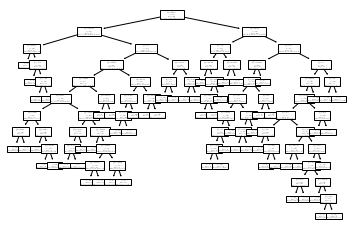

In [143]:
from sklearn.tree import plot_tree ##Import
plot_tree(mytree2)  ##plot ต้นไม้

###Evaluate

In [144]:
from sklearn.metrics import accuracy_score ##Import

###Test

In [145]:
mytree_result = mytree.predict(X_val) ## Test

In [146]:
accuracy_score(y_val,mytree_result)  ##ดูความแมนยำ

0.8716854617494666

##KNN

###Import

In [147]:
from sklearn.neighbors import KNeighborsClassifier ##Import

###KNN1

In [148]:
# Define
neigh1 = KNeighborsClassifier(n_neighbors=4, weights='uniform') # ถามเพื่อนบ้านที่ใกล้สุด 4 คนและทุกๆคนเท่ากัน
#Train
neigh1.fit(X_train2,y_train2)
#Test
KNN1_result = neigh1.predict(X_val)
accuracy_score(y_val, KNN1_result) ##ค่าความแม่นยำ

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


0.8473026516306005

###KNN2

In [149]:
# Define
neigh2 = KNeighborsClassifier(n_neighbors=30, weights='distance') # ถามเพื่อนบ้าน 30 คน และเพื่อนบ้านที่ใกล้มากกว่าเพื่อนบ้านที่ไกล
#Train
neigh2.fit(X_train2,y_train2)
#Test
KNN2_result = neigh2.predict(X_val)
accuracy_score(y_val, KNN2_result) ##ค่าความแม่นยำ

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


0.8661993294727217

###KNN3

In [150]:
# Define
neigh3 = KNeighborsClassifier(n_neighbors=1) # เลือกเพื่อนบ้านที่ใกล้ที่สุดแค่คนเดียว
#Train
neigh3.fit(X_train2,y_train2)
#Test
KNN3_result = neigh3.predict(X_val)
accuracy_score(y_val, KNN3_result) ##ค่าความแม่นยำ

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


0.8512648582749162

##Neural Network

In [151]:
#Import
from sklearn.neural_network import MLPClassifier ##Import


#Define
perceptron1 = MLPClassifier(random_state=6, max_iter=2000,hidden_layer_sizes=1,learning_rate_init=0.005) ##Define

###Train-Test

###ANN1

In [152]:
#Train
perceptron1.fit(X_train2,y_train2) 
#Test
perceptron1_result = perceptron1.predict(X_val)
accuracy_score(y_val,perceptron1_result) ##ค่าความแม่นยำ

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5214873514172509

###ANN2

In [153]:
perceptron2 = MLPClassifier(random_state=6, max_iter=2000,hidden_layer_sizes=10,learning_rate_init=0.005) #กำหนด max_iter=2000 และ learning_rate_init=0.005
#Train
perceptron2.fit(X_train2,y_train2)
#Test
perceptron2_result = perceptron2.predict(X_val)
accuracy_score(y_val,perceptron2_result) ##ค่าความแม่นยำ

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5214873514172509

###ANN3

In [154]:
perceptron3 = MLPClassifier(random_state=6, max_iter=20000,hidden_layer_sizes=10,learning_rate_init=0.001) #กำหนด max_iter=20000 และ learning_rate_init=0.001
#Train
#Train
perceptron3.fit(X_train2,y_train2)
#Test
perceptron3_result = perceptron3.predict(X_val)
accuracy_score(y_val,perceptron3_result)  ##ค่าความแม่นยำ

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5214873514172509

##Retain & Evaluate

In [193]:
mytree_result_final = DecisionTreeClassifier(splitter='random',random_state=13)  ## เลือก Decision Tree
#Train
mytree_result_final.fit(X_train,y_train)
#Test
mytreefinal_result = mytree.predict(X_test)
accuracy_score(y_test,mytreefinal_result) ##ค่าความแม่นยำ

0.8749885688157293

In [156]:
from sklearn.tree import DecisionTreeClassifier

In [157]:
mytree = DecisionTreeClassifier()

In [158]:
mytree.fit(X_train2,y_train2)
mytree_result = mytree.predict(X_val)

##Evaluation

In [159]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  ##Import

In [160]:
accuracy_score(y_val ,mytree_result)

0.8716854617494666

In [161]:
confusion_matrix(y_val,mytree_result)

array([[   7,    0,    0,   18,    6,    0,    0,    0,   10],
       [   0,  253,    0,    0,    0,    0,    9,    4,    0],
       [   0,    0,  146,   25,    0,    0,    0,    0,   73],
       [   0,    0,    0,  110,    0,    0,    0,    0,   17],
       [   0,    0,   23,   11,   20,    0,    0,    0,   25],
       [   0,    0,    0,    0,    0, 1711,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,  386,    0,   43],
       [   0,    0,    0,    0,    0,    0,   43,   33,    0],
       [   0,    0,   70,   28,    0,    0,   16,    0,  194]])

In [162]:
ref = classification_report(y_val,mytree_result)
print(ref)

               precision    recall  f1-score   support

   *ด่วนพิเศษ       1.00      0.17      0.29        41
     ชานเมือง       1.00      0.95      0.97       266
         ด่วน       0.61      0.60      0.60       244
    ด่วนพิเศษ       0.57      0.87      0.69       127
ด่วนพิเศษ CNR       0.77      0.25      0.38        79
     ท้องถิ่น       1.00      1.00      1.00      1711
       ธรรมดา       0.85      0.90      0.87       429
พิเศษชานเมือง       0.89      0.43      0.58        76
         เร็ว       0.54      0.63      0.58       308

     accuracy                           0.87      3281
    macro avg       0.80      0.64      0.66      3281
 weighted avg       0.88      0.87      0.87      3281



##Data Visualization

In [163]:
from matplotlib import pyplot as plt ### Import
import matplotlib as matplotlib

In [164]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf  ##โหลด font ภาษาไทย

In [165]:
matplotlib.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf') ##ติดตั้ง font ภาษาไทย
matplotlib.rc('font', family='TH Sarabun New')

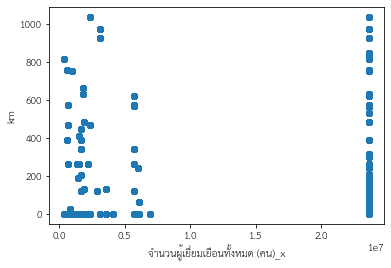

In [166]:
plt.scatter(data=table_challenge,y='km',x='จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)_x') ##plot กราฟดูการกระจายของข้อมูล km และ จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)_x
plt.ylabel('km')
plt.xlabel('จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)_x')
plt.show()

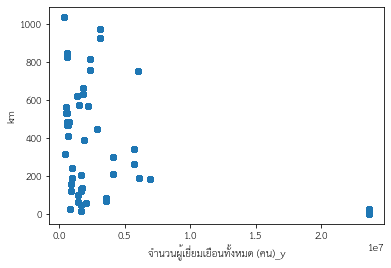

In [167]:
plt.scatter(data=table_challenge,y='km',x='จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)_y') ##plot กราฟดูการกระจายของข้อมูล km และ จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)_y
plt.ylabel('km')
plt.xlabel('จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)_y')
plt.show()

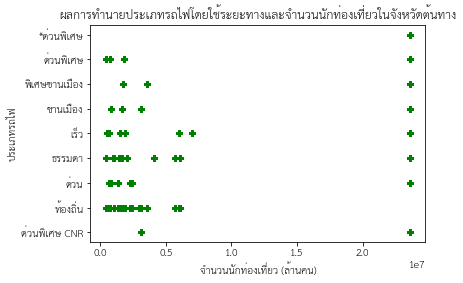

In [194]:
### plot กราฟทำนายผลเพื่อตอบ Challenge
plt.plot(X_test['จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)_x'], mytreefinal_result,'Pg',alpha =0.5)
plt.xlabel('จำนวนนักท่องเที่ยว (ล้านคน)')
plt.ylabel('ประเภทรถไฟ')
plt.title('ผลการทำนายประเภทรถไฟโดยใช้ระยะทางและจำนวนนักท่องเที่ยวในจังหวัดต้นทาง')
plt.show()

อธิบาย : จากกราฟผลการทำนายประเภทรถไฟโดยใช้ระยะทางและจำนวนนักท่องเที่ยวในจังหวัดต้นทาง พบว่า ถ้าจังหวัดต้นทางมีจำนวนนักท่องเที่ยว 700,000 คน ประเภทของรถไฟที่ควรเลือกใช้ก็คือ รถไฟเร็ว และถ้าจังหวัดต้นทางมีจำนวนนักท่องเที่ยว 400,000 คน ประเภทของรถไฟที่ควรเลือกใช้ก็คือ รถไฟธรรมดา 

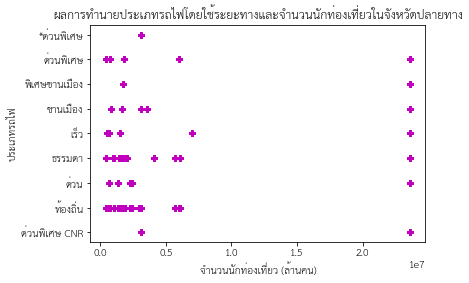

In [195]:
### plot กราฟทำนายผลเพื่อตอบ Challenge
plt.plot(X_test['จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)_y'], mytreefinal_result,'Pm',alpha =0.5)
plt.xlabel('จำนวนนักท่องเที่ยว (ล้านคน)')
plt.ylabel('ประเภทรถไฟ')
plt.title('ผลการทำนายประเภทรถไฟโดยใช้ระยะทางและจำนวนนักท่องเที่ยวในจังหวัดปลายทาง')
plt.show()

อธิบาย : จากกราฟผลการทำนายประเภทรถไฟโดยใช้ระยะทางและจำนวนนักท่องเที่ยวในจังหวัดปลายทาง พบว่า ถ้าจังหวัดต้นทางมีจำนวนนักท่องเที่ยว 600,000 คน ประเภทของรถไฟที่ควรเลือกใช้ก็คือ รถไฟด่วนพิเศษ รถไฟธรรมดา หรือรถไฟท้องถิ่น และถ้าจังหวัดต้นทางมีจำนวนนักท่องเที่ยว 350,000 คน ประเภทของรถไฟที่ควรเลือกใช้ก็คือ รถไฟ*ด่วนพิเศษ รถไฟชานเมือง รถไฟท้องถิ่น หรือรถไฟด่วนพิเศษ CNR

# **2. แบ่งกลุ่มข้อมูลรถไฟขาเข้าที่มี ลองจิจูด(column : X) และ ละติจูด (column : Y) ที่ใกล้กันจำนวน 6 กลุ่ม**
##K-Means

##สถานีต้นทาง

In [196]:
from sklearn.cluster import KMeans  ##import kmaen
import matplotlib.pyplot as plt ##import pyplot

In [197]:
model = KMeans(n_clusters=6)  ## Define จำนวนกลุ่ม cluster
model ## ดู model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [198]:
X = table_mix[['X_x','Y_x']]  ## กำหนด X ให้เอาค่าในตาราง table_mix ซึ่ง  X_x คือ ลองจิจูดของสถานีต้นทาง และ Y_x คือ ละติจูดของสถานีต้นทาง
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [202]:
model.cluster_centers_ #ดู center ของ cluster ที่แบ่งจำนวน 6 กลุ่ม

array([[100.54612159,  14.04972205],
       [104.74867381,  15.17957781],
       [ 99.94423085,   8.09831104],
       [102.77167755,  17.47730766],
       [ 99.82620665,  17.61174747],
       [102.23929489,  15.01773429]])

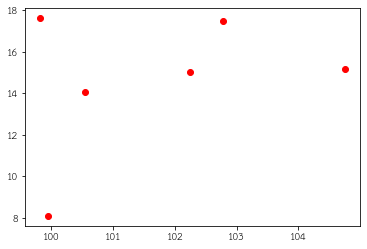

In [203]:
plt.scatter(model.cluster_centers_[:,0] ,model.cluster_centers_[:,1] ,c='red')  ## plot จุด cluster center ลงในกราฟ

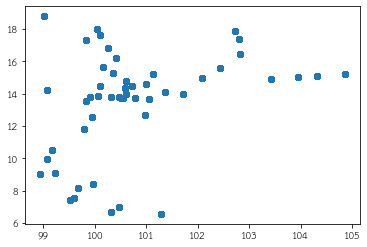

In [205]:
plt.scatter(data=table_mix , x='X_x',y='Y_x')  ## plot กราฟ scatter ดูความกระจายของข้อมูล ลองจิจูด และ ละติจูด

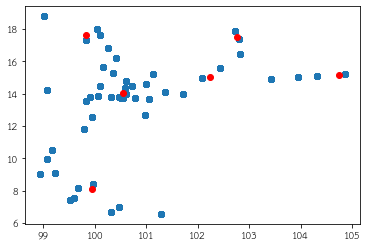

In [206]:
plt.scatter(data=table_mix , x='X_x',y='Y_x')
plt.scatter(model.cluster_centers_[:,0] ,model.cluster_centers_[:,1] ,c='red')   ### ทำการ plot จุด cluster center และ การกระจายของข้อมูล ในกราฟเดียวกัน

In [207]:
identified_clusters1 = model.fit_predict(X)  ## ระบุ cluster ลงในตัวแปร identified_clusters
identified_clusters1

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

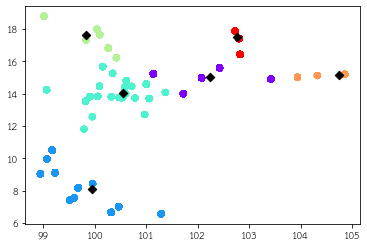

In [208]:
###ทำการเพิ่ม column ชื่อ Cluster ที่ได้ระบุกลุ่มแล้ว ลงในตาราง table_mix
data_with_clusters = table_mix.copy()   
data_with_clusters['Clusters'] = identified_clusters1 

## plot กราฟ แสดงกลุ่ม cluster
plt.scatter(data_with_clusters['X_x'],data_with_clusters['Y_x'],c=data_with_clusters['Clusters'],cmap='rainbow' ,alpha=0.25)
plt.scatter(model.cluster_centers_[:,0] ,model.cluster_centers_[:,1] ,c='black',alpha=1 ,marker='D')

##สถานีปลายทาง

In [209]:
Y = table_mix[['X_y','Y_y']]  ## กำหนด X ให้เอาค่าในตาราง table_mix ซึ่ง X_x คือ ลองจิจูดของสถานีปลายทาง และ Y_y คือ ละติจูดของสถานีปลายทาง
model.fit(Y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [210]:
model.cluster_centers_

array([[100.56893375,  14.07087658],
       [102.77167755,  17.47730766],
       [104.48010116,  15.12207626],
       [ 99.94423085,   8.09831104],
       [ 99.82684641,  17.61935411],
       [102.06621086,  15.09661994]])

In [211]:
identified_clusters2 = model.fit_predict(Y)  ## ระบุ cluster ลงในตัวแปร identified_clusters
identified_clusters2

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

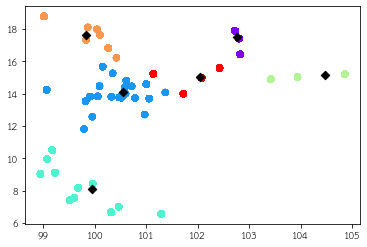

In [212]:
###ทำการเพิ่ม column ชื่อ Cluster ที่ได้ระบุกลุ่มแล้ว ลงในตาราง table_mix
data_with_clusters = table_mix.copy()   
data_with_clusters['Clusters'] = identified_clusters2 

## plot กราฟ แสดงกลุ่ม cluster
plt.scatter(data_with_clusters['X_y'],data_with_clusters['Y_y'],c=data_with_clusters['Clusters'],cmap='rainbow' ,alpha=0.5)
plt.scatter(model.cluster_centers_[:,0] ,model.cluster_centers_[:,1] ,c='black',alpha=1 ,marker='D')

# **3. หาจังหวัดที่มีรถไฟขาเข้ามากที่สุด**

In [213]:
data = table_mix[['จังหวัด_y','StFinal','ภาค_y']] ##เลือกคอลัมน์ที่ต้องการ

In [214]:
Top_Prov = data.groupby('จังหวัด_y').count().sort_values(by=['StFinal'],ascending=False) ##นำข้อมูล จังหวัด_y จากตาราง Data โดยพิจารณาจาก StFinal 
Top_Prov ##เรียกดูตาราง

,StFinal,ภาค_y
จังหวัด_y,,
กรุงเทพ,5068,5068
นครราชสีมา,2855,2855
อุบลราชธานี,2176,2176
ลพบุรี,1606,1606
พิษณุโลก,980,980
สระบุรี,938,938
สุรินทร์,882,882
หนองคาย,784,784
เชียงใหม่,720,720


In [215]:
Top_Prov.shape ##ดูขนาดของตาราง

(32, 2)

In [216]:
from matplotlib import pyplot as plt  ## เรียกฟังก์ชันในการ Plot กราฟ

In [217]:
Top_Prov.iloc[-33:,1]  ##ตัดคอมลัมน์

จังหวัด_y
กรุงเทพ            5068
นครราชสีมา         2855
อุบลราชธานี        2176
ลพบุรี             1606
พิษณุโลก            980
สระบุรี             938
สุรินทร์            882
หนองคาย             784
เชียงใหม่           720
นครศรีธรรมราช       625
อุดรธานี            609
สงขลา               556
ฉะเชิงเทรา          532
อุตรดิตถ์           408
สุราษฎร์ธานี        384
นครสวรรค์           380
ชุมพร               351
ยะลา                336
ขอนแก่น             252
ปราจีนบุรี          220
ราชบุรี             215
นครปฐม              200
กาญจนบุรี           175
ตรัง                116
พระนครศรีอยุธยา     116
สุพรรณบุรี           80
แพร่                 76
ประจวบคีรีขันธ์      58
สุโขทัย              56
พิจิตร               52
ชลบุรี               40
ปทุมธานี             24
Name: ภาค_y, dtype: int64

## Plot กราฟ

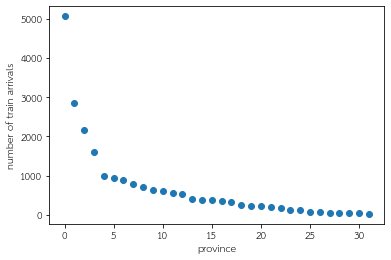

In [218]:
plt.scatter(range(len(Top_Prov.iloc[-33:,1])),Top_Prov.iloc[-33:,1]) ## Plot กราฟ
plt.xlabel('province'); ##ใส่ชื่อแกน X
plt.ylabel('number of train arrivals'); ##ใส่ชื่อแกน Y

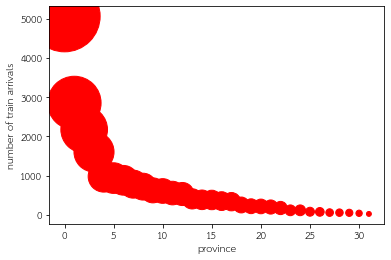

In [219]:
plt.scatter(range(len(Top_Prov.iloc[-33:,1])),Top_Prov.iloc[-33:,1],s=1*Top_Prov.iloc[-33:,1],c=['r'])  ## Plot กราฟ โดยขนาดของจุด*แปรผันตรงกับขนาดของข้อมูล
plt.xlabel('province'); ##ใส่ชื่อแกน X
plt.ylabel('number of train arrivals'); ##ใส่ชื่อแกน Y

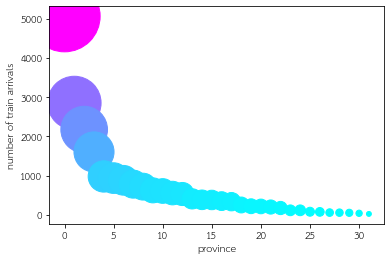

In [220]:
plt.scatter(range(len(Top_Prov.iloc[-33:,1])),Top_Prov.iloc[-33:,1],s=1*Top_Prov.iloc[-33:,1],c=0.5*Top_Prov.iloc[-33:,1],cmap='cool')  ## Plot กราฟ โดยเปลี่ยนสีจุดตามข้อมูล
plt.xlabel('province'); ##กำหนดชื่อในแกน x
plt.ylabel('number of train arrivals'); ##กำหนดชื่อในแกน y

##สรุป

In [221]:
Top_Prov.iloc[-33:1,]

,StFinal,ภาค_y
จังหวัด_y,,
กรุงเทพ,5068,5068


จากตารางจะเห็นได้ว่า จังหวัดกรุงเทพ เป็นจังหวัดที่มีรถไฟขาเข้ามากที่สุด


